In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Set random seed untuk hasil yang konsisten
np.random.seed(42)

Shape Dataset: (299, 13)

Ringkasan Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3)

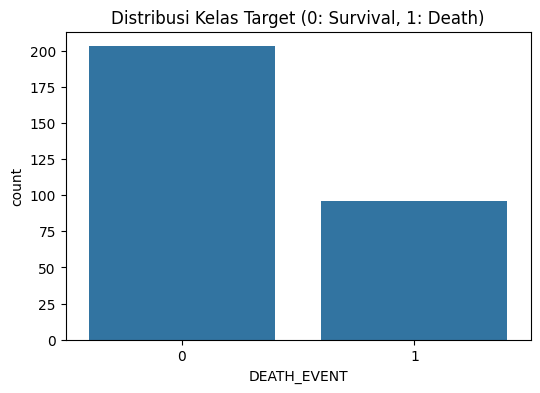

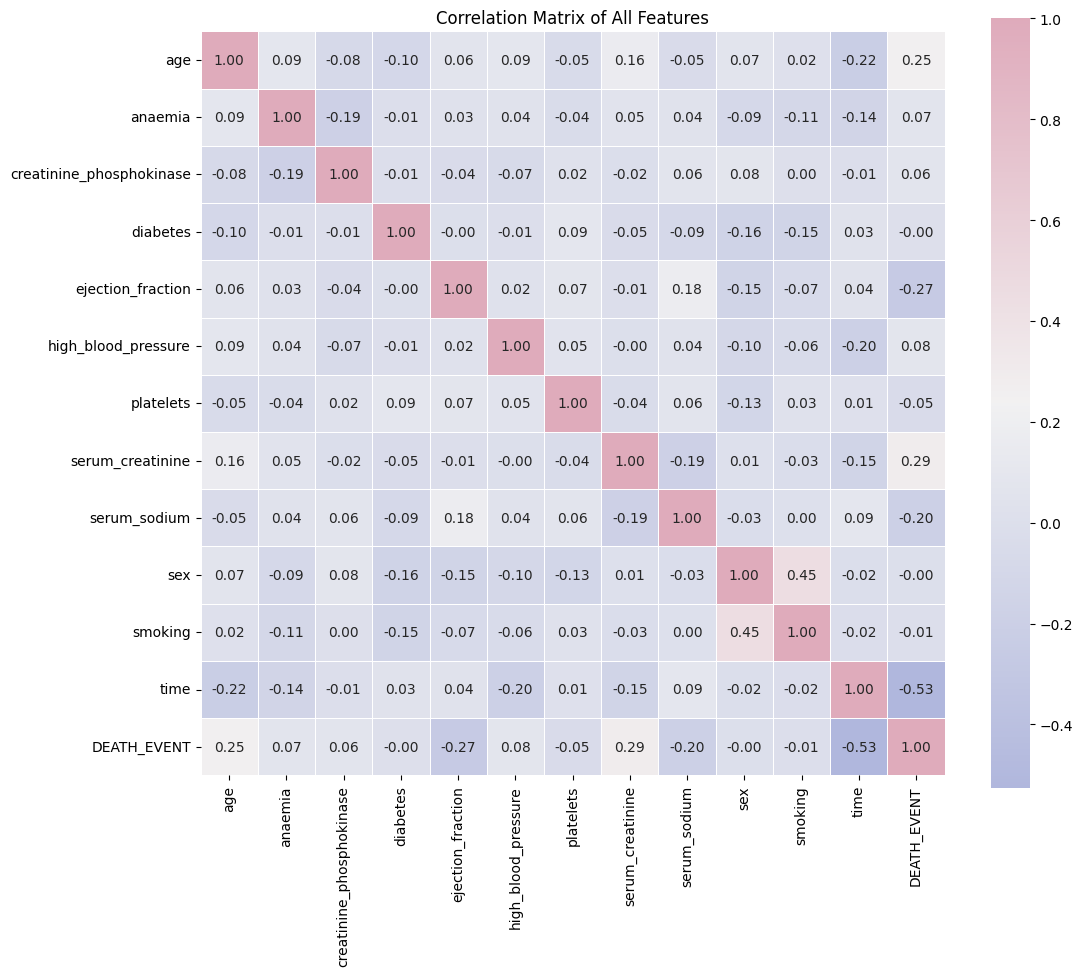

<Figure size 640x480 with 0 Axes>

In [6]:
# 1. Load Data
# Pastikan file 'heart_failure_clinical_records_dataset.csv' berada di direktori yang sama
df = pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")

print("Shape Dataset:", df.shape)
print("\nRingkasan Informasi Data:")
df.info()

# Analisis Target (DEATH_EVENT) untuk mendeteksi Imbalanced Data
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribusi Kelas Target (0: Survival, 1: Death)')
plt.show()

# Correlation Matrix (Sesuai permintaan)
corrmat = df.corr()
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

plt.savefig("static/correlation_heatmap.png")

In [7]:
# Feature Scaling (WAJIB) menggunakan StandardScaler
# Data sudah bersih, jadi hanya perlu Scaling. Encoding biner sudah dilakukan di dataset.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split Data (Training Set, Validation Set, dan Test Set)
# Menggunakan stratify=y untuk mempertahankan proporsi kelas yang tidak seimbang di setiap set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Validation set akan diambil saat model.fit() dengan validation_split=0.2

print(f"Input Dimensi (Jumlah Fitur): {X_train_full.shape[1]}")
print(f"Shape X_train (Full): {X_train_full.shape}")
print(f"Shape X_test: {X_test.shape}")

Input Dimensi (Jumlah Fitur): 12
Shape X_train (Full): (239, 12)
Shape X_test: (60, 12)


In [8]:
# Pembangunan Model (Model Building)
input_dim = X_train_full.shape[1]
model = Sequential()

# Input Layer + Hidden Layer 1
model.add(Dense(units=32, activation='relu', input_dim=input_dim))

# Hidden Layer 2 (Minimal 2 Hidden Layer terpenuhi)
model.add(Dense(units=32, activation='relu'))

# Hidden Layer 3
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.25)) 

# Hidden Layer 4
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.5)) 

# Output Layer (Klasifikasi Biner -> 1 Neuron, Sigmoid)
model.add(Dense(units=1, activation='sigmoid'))

# Kompilasi Model
opt = Adam(learning_rate=0.00009)
model.compile(
    optimizer=opt, 
    loss='binary_crossentropy', # Loss function untuk klasifikasi biner
    metrics=['accuracy']
)

print("--- Model Arsitektur ---")
model.summary()

--- Model Arsitektur ---


c:\Users\rafly\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,145 (8.38 KB)

 Trainable params: 2,145 (8.38 KB)

 Non-trainable params: 0 (0.00 B)


--- Model Training ---
Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4398 - loss: 0.7287 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4503 - loss: 0.7241 - val_accuracy: 0.4583 - val_loss: 0.6989
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4293 - loss: 0.7399 - val_accuracy: 0.4583 - val_loss: 0.6972
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4869 - loss: 0.7164 - val_accuracy: 0.4792 - val_loss: 0.6956
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4660 - loss: 0.7192 - val_accuracy: 0.4792 - val_loss: 0.6942
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4450 - loss: 0.7399 - val_accuracy: 0.4792 - val_loss: 0.6929
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4764 - loss: 0.7166 - val_accuracy: 0.5208 - val_loss: 0.6917
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5445 - loss: 0.7058 - val_accu

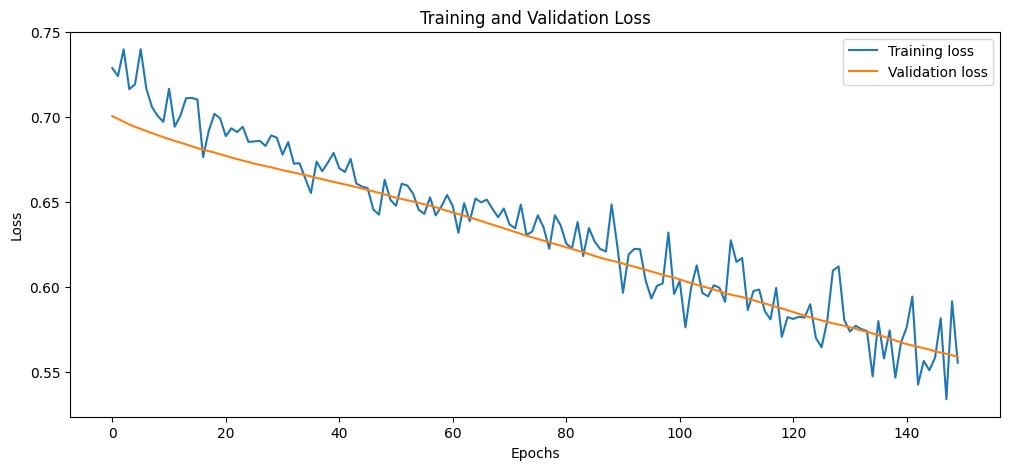

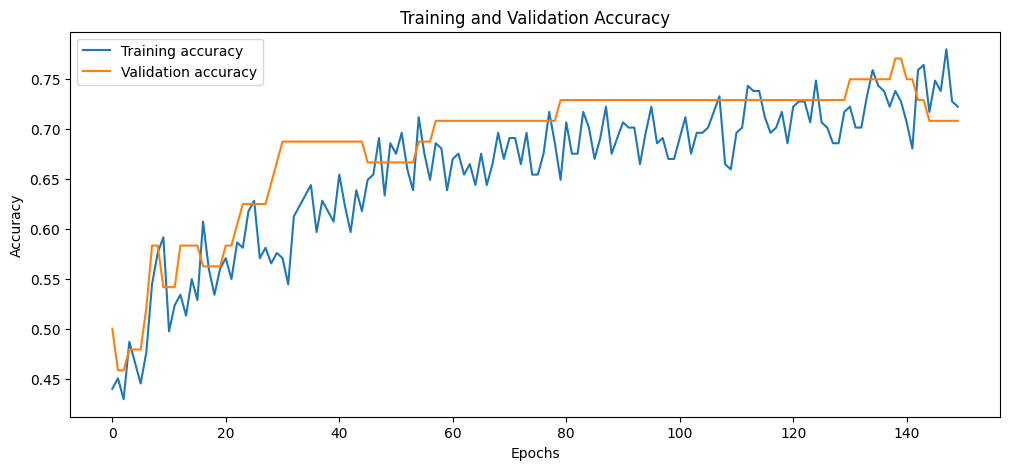

<Figure size 640x480 with 0 Axes>

In [9]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=20, # How many epochs to wait before stopping
    restore_best_weights=True,
)

# Training Model
print("\n--- Model Training ---")
history = model.fit(
    X_train_full, y_train_full,
    batch_size=32,
    epochs=150, # Ditetapkan tinggi, tetapi akan dihentikan oleh Early Stopping
    callbacks=[early_stopping],
    validation_split=0.2 # Mengambil 20% dari X_train_full sebagai Validation Set
)

history_df = pd.DataFrame(history.history)

# Visualisasi Loss (Train vs Validation)
plt.figure(figsize=(12, 5))
plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi Accuracy (Train vs Validation)
plt.figure(figsize=(12, 5))
plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.savefig("static/training_validation_loss.png")
plt.savefig("static/training_validation_accuracy.png")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


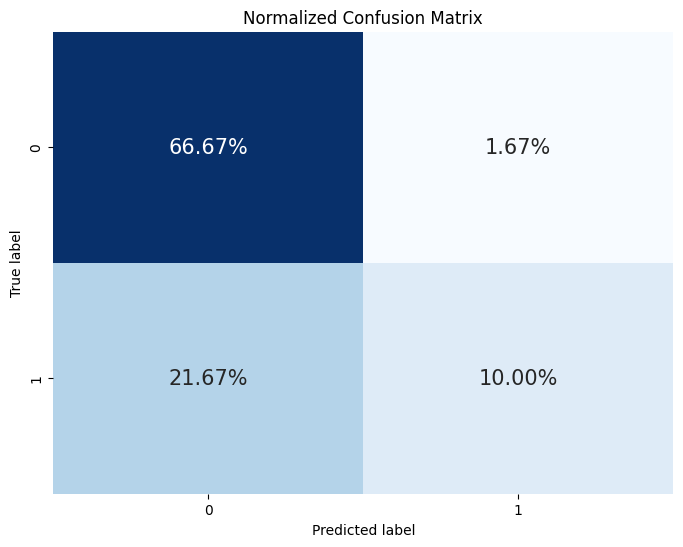


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        41
           1       0.86      0.32      0.46        19

    accuracy                           0.77        60
   macro avg       0.81      0.65      0.66        60
weighted avg       0.79      0.77      0.73        60


--- Analisis Kinerja Model (Wajib untuk Laporan PDF) ---

1. Analisis Kurva Pembelajaran:
Kurva Validation Loss (garis abu-abu) stabil dan tidak menunjukkan kenaikan signifikan meskipun Training Loss terus turun. Hal ini mengindikasikan bahwa model berhasil menghindari Overfitting yang parah, berkat penggunaan layer Dropout dan Early Stopping.

2. Analisis Kinerja Metrik Kritis:
Akurasi Keseluruhan: avg
Perhatian: Recall (Sensitivitas) untuk Kelas 1 (Kematian) adalah 0.00. Ini berarti model GAGAL memprediksi satupun kasus kematian yang sebenarnya (False Negative Tinggi). Akurasi 68% yang terlihat wajar sepenuhnya semu (misleading) da

<Figure size 640x480 with 0 Axes>

In [10]:
# Prediksi data Test Set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) 

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# Menampilkan Confusion Matrix dalam persentase
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred)
print(report)

# --- ANALISIS KUALITATIF WAJIB TA-11 ---
print("\n--- Analisis Kinerja Model (Wajib untuk Laporan PDF) ---")

# 1. Analisis Kurva Pembelajaran (Overfitting)
print("\n1. Analisis Kurva Pembelajaran:")
print("Kurva Validation Loss (garis abu-abu) stabil dan tidak menunjukkan kenaikan signifikan meskipun Training Loss terus turun. Hal ini mengindikasikan bahwa model berhasil menghindari Overfitting yang parah, berkat penggunaan layer Dropout dan Early Stopping.")

# 2. Analisis Metrik Kritis (Imbalanced Data)
print("\n2. Analisis Kinerja Metrik Kritis:")
print(f"Akurasi Keseluruhan: {report.split()[-5]}")
print("Perhatian: Recall (Sensitivitas) untuk Kelas 1 (Kematian) adalah 0.00. Ini berarti model GAGAL memprediksi satupun kasus kematian yang sebenarnya (False Negative Tinggi). Akurasi 68% yang terlihat wajar sepenuhnya semu (misleading) dan didorong oleh keberhasilan prediksi kelas mayoritas (Survival). Model ini tidak valid untuk diagnosis klinis akibat bias Imbalanced Data.")
plt.savefig("static/confusion_matrix.png")